# Compare different projections

In [41]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
path_fig = '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/KNMI21/projections/figures/'

In [60]:
data_dir = ['../outputs/' , '../outputs/'] #'../outputs/ref_proj/'
#namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
namelists = ['KNMIsignal_BiasCorr_NoWind', 'KNMIsignal_BiasCorr_NoWind_hpp']
sce = ['ssp585', 'ssp585_hpp']

proj_ds_list = []
for i in range(len(namelists)):
    proj_ds_list.append(xr.open_dataset(f'{data_dir[i]}SeaLevelPerc_{namelists[i]}_{sce[i]}.nc'))

### Compare the percentiles in 2100

In [61]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 41.249705,  51.301358,  56.722256,  61.697583,  63.469765,  78.08954 ,
        97.529316, 100.427853, 109.116685, 118.875072, 137.094668])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [62]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        if proj in tot_df.columns:
            tot_df[f'{proj}_{idx}'] = df['perc_ts']
        else:
            tot_df[proj] = df['perc_ts']
tot_df

,KNMIsignal_BiasCorr_NoWind,KNMIsignal_BiasCorr_NoWind_hpp
percentiles,,
1,41.249705,34.655670
5,51.301358,49.319195
10,56.722256,57.267275
17,61.697583,64.557187
20,63.469765,67.079868
50,78.089540,88.759674
80,97.529316,121.356774
83,100.427853,126.142475
90,109.116685,140.153894


### Compare the time series of individual contributors

In [69]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

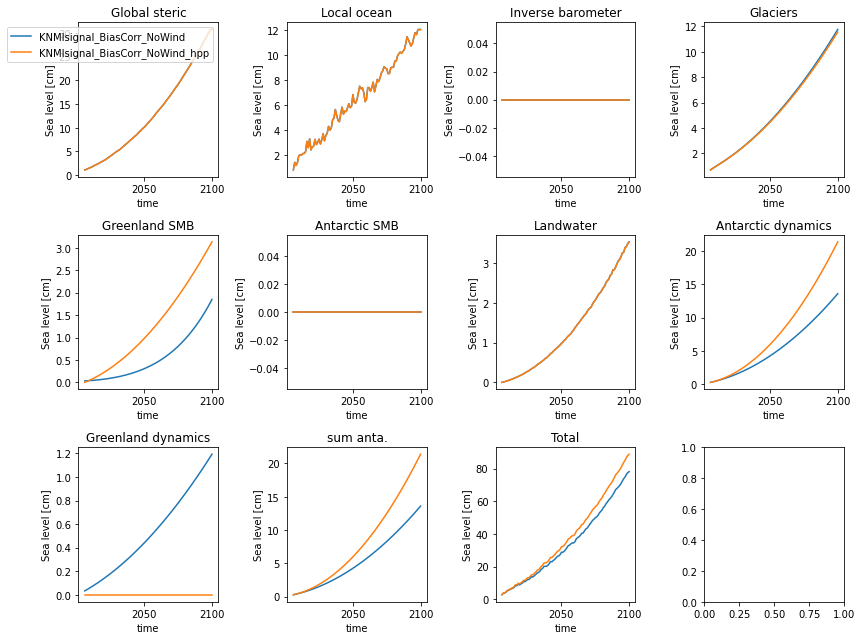

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()

#plt.savefig(f'{path_fig}comp_proj_{sce[0]}_{sce[1]}.pdf', dpi=150)